# Week 4


# Using Julia for descriptive statistics

<h2>In this lesson</h2>


- Adding Package
- Creating Random Variable
- Descriptive statistics
- Creating a dataframe
- Descriptive statistics using a dataframe
- Visualizing data
- Inferential statistics
- Exporting data as a csv file

# 1. Add Package

If the package that are listed below are  not installed on your system, then do the following for each package
            
            using Pkg
            Pkg.add("PyPlot")

In [1]:
using Distributions    #Create Random Variable
using StatsBase      #Basic Statistical Support
using CSV           # Reading and Writing CSV files
using DataFrames    # Creating a data structure
using HypothesisTests     #Perform Statistical Hypothesis tests
using GLM           # General Linear Models
using StatsPlots     # For Plots
pyplot()

Plots.PyPlotBackend()

# 2. Creating Random Variable

We mentioned in the introduction that the creation of the simulated data is the best way to start learning how to use julia for statistics

In below cade we create the five variable with random data point values

In [2]:
age = rand(18:80,100)   #Unifrom distribution
wcc = round.(rand(Distributions.Normal(12,2),100),digits=1)  # Normal Distributed and round to one decimal
crp = round.(Int,rand(Distributions.Chisq(4),100)).* 10   # Chi-squared Distributed with broadcasting and alternate round()
treatment= rand(["A","B"],100);                  # Unifromly Distributed
result =rand(["Improved","Static","Worse"],100);  # Unifromly Distributed

# 3. Descriptive statistics

While there are common statistical function in Julia such as mean() and std(), but it is more convenient to use the describe() function from the StatsBase 

In [3]:
# Mean of Age Variable
mean(age)

46.7

In [4]:
# Standard deviation of age
std(age)

18.393839548428527

In [5]:
# Variance of age 
var(age)

338.3333333333334

In [6]:
# mean of wcc
mean(wcc)

11.937000000000001

In [7]:
# Standard deviation of wcc
std(wcc)

2.0596486412134776

In [8]:
# Variance of wcc 
var(wcc)

4.242152525252525

In [9]:
# Descriptive statistics of age variable
StatsBase.describe(age)

Summary Stats:
Length:         100
Missing Count:  0
Mean:           46.700000
Minimum:        18.000000
1st Quartile:   29.750000
Median:         44.000000
3rd Quartile:   63.000000
Maximum:        80.000000
Type:           Int64


In [10]:
# summarystats() function omits the type 
StatsBase.summarystats(wcc)

Summary Stats:
Length:         100
Missing Count:  0
Mean:           11.937000
Minimum:        6.700000
1st Quartile:   10.475000
Median:         11.750000
3rd Quartile:   13.400000
Maximum:        16.900000


# 4. Creating a dataframe

We created simulated data, it is best to store in dateframe object for easier manipulation

In [11]:
data=DataFrame(Age =age, WCC=wcc, CRP =crp, Treatment= treatment, Result=result );

In [12]:
# size of the data
size(data)

(100, 5)

In [13]:
# first 6 rows of the data
first(data,6)

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,75,12.9,30,B,Worse
2,41,10.9,50,A,Worse
3,36,13.4,20,A,Static
4,46,11.0,100,A,Improved
5,27,13.6,10,B,Static
6,37,12.5,70,B,Worse


We can create the dataframe objects by selecting only the subjects according to the data points values for a particular variable

In [14]:
dataA = data[data[:Treatment].=="A",:]  # Only Patient of treatment group A
dataB = data[data[:Treatment].=="B",:];  # Only Patient of treatment group B

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[14]:1
└ @ Core In[14]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[14]:2
└ @ Core In[14]:2


In [15]:
first(dataA,4)

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,41,10.9,50,A,Worse
2,36,13.4,20,A,Static
3,46,11.0,100,A,Improved
4,39,10.2,20,A,Improved


In [16]:
first(dataB,10)

,Age,WCC,CRP,Treatment,Result
,Int64,Float64,Int64,String,String
1,75,12.9,30,B,Worse
2,27,13.6,10,B,Static
3,37,12.5,70,B,Worse
4,57,10.1,10,B,Worse
5,57,11.8,0,B,Static
6,78,11.0,60,B,Improved
7,71,11.3,0,B,Improved
8,42,10.9,20,B,Improved
9,59,9.6,30,B,Improved


# 5. Descriptive statistics using a dataframe

The describe() function will attempt to provide Descriptive statistics of the data object

In [17]:
describe(data)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Age,46.7,18,44.0,80,,,Int64
2,WCC,11.937,6.7,11.75,16.9,,,Float64
3,CRP,39.2,0,30.0,130,,,Int64
4,Treatment,,A,,B,2,,String
5,Result,,Improved,,Worse,3,,String


We can count the number of the elements in the sample spaceof the categorical variable using the by() function

In [18]:
# counting the number of pateints in group A and group B
by(data, :Treatment, df -> DataFrame(N=size(df,1)))

┌ Warning: `by(d::AbstractDataFrame, cols::Any, f::Base.Callable; sort::Bool = false, skipmissing::Bool = false)` is deprecated, use `combine(f, groupby(d, cols, sort = sort, skipmissing = skipmissing))` instead.
│   caller = top-level scope at In[18]:1
└ @ Core In[18]:1


,Treatment,N
,String,Int64
1,B,53
2,A,47


In [19]:
# The size argument will give the same output other than adding the number of variable
by(data, :Treatment,size)

┌ Warning: `by(d::AbstractDataFrame, cols::Any, f::Base.Callable; sort::Bool = false, skipmissing::Bool = false)` is deprecated, use `combine(f, groupby(d, cols, sort = sort, skipmissing = skipmissing))` instead.
│   caller = top-level scope at In[19]:1
└ @ Core In[19]:1


,Treatment,x1
,String,Tuple…
1,B,"(53, 5)"
2,A,"(47, 5)"


The Usual Descriptive statistics of the numerical values can be calculated after the seperation of the categorical value 

In [20]:
# Mean of the Group A and Group B pateints
by(data, :Treatment, df-> mean(df.Age))

┌ Warning: `by(d::AbstractDataFrame, cols::Any, f::Base.Callable; sort::Bool = false, skipmissing::Bool = false)` is deprecated, use `combine(f, groupby(d, cols, sort = sort, skipmissing = skipmissing))` instead.
│   caller = top-level scope at In[20]:1
└ @ Core In[20]:1


,Treatment,x1
,String,Float64
1,B,45.2264
2,A,48.3617


In [21]:
# Standard Deviation  of the Group A and Group B  pateints
by(data, :Treatment, df-> std(df.Age))

┌ Warning: `by(d::AbstractDataFrame, cols::Any, f::Base.Callable; sort::Bool = false, skipmissing::Bool = false)` is deprecated, use `combine(f, groupby(d, cols, sort = sort, skipmissing = skipmissing))` instead.
│   caller = top-level scope at In[21]:1
└ @ Core In[21]:1


,Treatment,x1
,String,Float64
1,B,19.3258
2,A,17.3386


By using the summarystats() we can get all the descriptive statistics

In [22]:
# Standard Deviation  of the Group A and Group B  pateints
by(data, :Treatment, df-> describe(df.Age))

┌ Warning: `by(d::AbstractDataFrame, cols::Any, f::Base.Callable; sort::Bool = false, skipmissing::Bool = false)` is deprecated, use `combine(f, groupby(d, cols, sort = sort, skipmissing = skipmissing))` instead.
│   caller = top-level scope at In[22]:1
└ @ Core In[22]:1


Summary Stats:
Length:         53
Missing Count:  0
Mean:           45.226415
Minimum:        18.000000
1st Quartile:   27.000000
Median:         43.000000
3rd Quartile:   60.000000
Maximum:        80.000000
Type:           Int64
Summary Stats:
Length:         47
Missing Count:  0
Mean:           48.361702
Minimum:        18.000000
1st Quartile:   33.500000
Median:         46.000000
3rd Quartile:   63.000000
Maximum:        78.000000
Type:           Int64


,Treatment,x1
,String,Nothing
1,B,
2,A,


# 6. Visualizing data

The Plots Package works well with the DataFrame package by allowing the macro funation from the latter. In the code below, we look at the age distribution of the two treatemts group

In [23]:
using StatsPlots
using StatsPlots: @df   # For Plots
pyplot()
gr()

Plots.GRBackend()

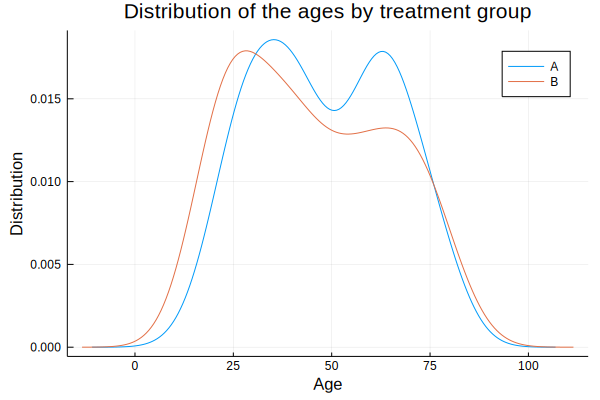

In [24]:
@df data density(:Age, group= :Treatment, title="Distribution of the ages by treatment group",
    xlab="Age", ylab="Distribution",
    legend= :topright)

We can do same for the Results

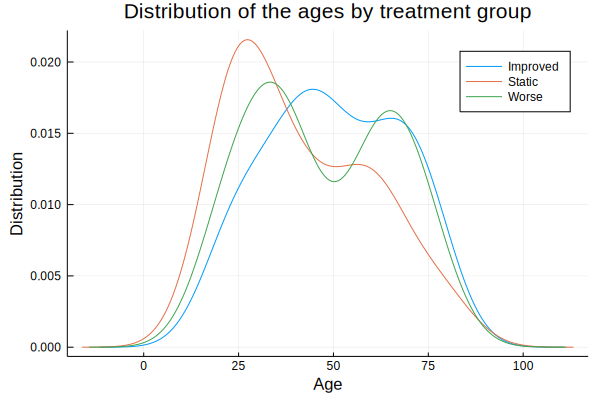

In [25]:
@df data density(:Age, group= :Result, title="Distribution of the ages by treatment group",
    xlab="Age", ylab="Distribution",
    legend= :topright)

We can even discriminate between all of the group

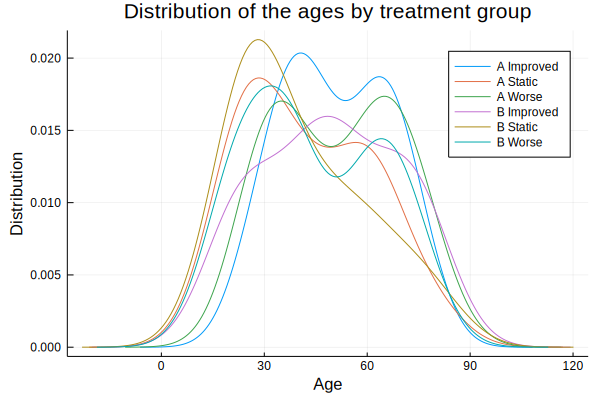

In [26]:
@df data density(:Age, group= (:Treatment,:Result), title="Distribution of the ages by treatment group",
    xlab="Age", ylab="Distribution",
    legend= :topright)

Lets create the box plot of the white cell count per treatment group and then per result group

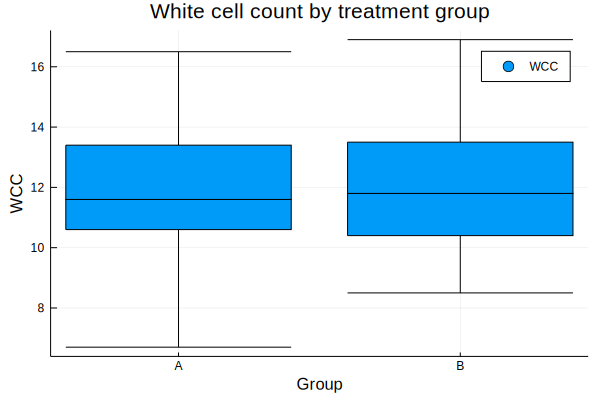

In [27]:
@df data boxplot(:Treatment, :WCC, lab="WCC", title="White cell count by treatment group",
    xlab="Group", ylab="WCC",)

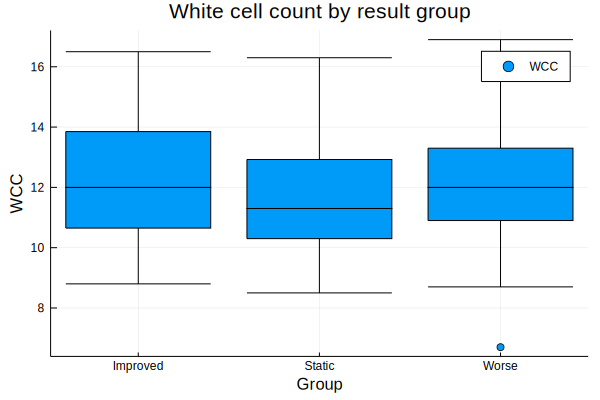

In [28]:
@df data boxplot(:Result, :WCC, lab="WCC", title="White cell count by result group",
    xlab="Group", ylab="WCC",)

Finally, we check on the correlation between the numerical  variable using the correlation plot and corner plot

In [29]:
#@df data corrplot([:Age :WCC :CRP], grid= false)

In [30]:
#@df data cornerplot([:Age :WCC :CRP], grid= false, compact= true)

# 7. Inferential statistics

We will begin by using the t test to compare the mean of the numerical variable between two group

In [31]:
# Difference in the age of the patients in group A and group B
HypothesisTests.EqualVarianceTTest(dataA[:Age],dataB[:Age])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[31]:1
└ @ Core In[31]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[31]:1
└ @ Core In[31]:1


Two sample t-test (equal variance)
----------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          3.1352870333199547
    95% confidence interval: (-4.1886, 10.4592)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.3977

Details:
    number of observations:   [47,53]
    t-statistic:              0.8495334965260241
    degrees of freedom:       98
    empirical standard error: 3.6905984827449476


In [32]:
pvalue(EqualVarianceTTest(dataA[:WCC],dataB[:WCC]))

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[32]:1
└ @ Core In[32]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[32]:1
└ @ Core In[32]:1


0.8288481308696544

In [33]:
UnequalVarianceTTest(dataA[:CRP],dataB[:CRP])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[33]:1
└ @ Core In[33]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[33]:1
└ @ Core In[33]:1


Two sample t-test (unequal variance)
------------------------------------
Population details:
    parameter of interest:   Mean difference
    value under h_0:         0
    point estimate:          4.319550381372942
    95% confidence interval: (-7.2361, 15.8752)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.4598

Details:
    number of observations:   [47,53]
    t-statistic:              0.7421825221477182
    degrees of freedom:       94.11991456041423
    empirical standard error: 5.820064812188089


We can create variety of linear model using the GLM.fit() function

In [34]:
fit(LinearModel, @formula(CRP ~ 1), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

CRP ~ 1

Coefficients:
──────────────────────────────────────────────────────────────────────────
             Estimate  Std. Error  t value  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)      39.2     2.88388  13.5928    <1e-23    33.4778    44.9222
──────────────────────────────────────────────────────────────────────────

In [35]:
fit(LinearModel, @formula(CRP ~ Age), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

CRP ~ 1 + Age

Coefficients:
─────────────────────────────────────────────────────────────────────────────
               Estimate  Std. Error   t value  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)  38.6479       7.94367   4.86524     <1e-5   22.8839    54.4118
Age           0.0118227    0.158372  0.074651    0.9406  -0.302462   0.326108
─────────────────────────────────────────────────────────────────────────────

In [36]:
fit(LinearModel, @formula(CRP ~ Age + WCC), data)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

CRP ~ 1 + Age + WCC

Coefficients:
──────────────────────────────────────────────────────────────────────────────
               Estimate  Std. Error    t value  Pr(>|t|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────────
(Intercept)  29.0003      19.0168    1.52499      0.1305  -8.74271   66.7433
Age           0.0155076    0.159068  0.0974904    0.9225  -0.300198   0.331213
WCC           0.793792     1.42057   0.558785     0.5776  -2.02564    3.61322
──────────────────────────────────────────────────────────────────────────────

We can conduct a chi squared test for the independence using the HypothesisTests.ChisqTest() function.

In [37]:
by(dataA, :Result, df -> DataFrame(N =size(df,1)))

┌ Warning: `by(d::AbstractDataFrame, cols::Any, f::Base.Callable; sort::Bool = false, skipmissing::Bool = false)` is deprecated, use `combine(f, groupby(d, cols, sort = sort, skipmissing = skipmissing))` instead.
│   caller = top-level scope at In[37]:1
└ @ Core In[37]:1


,Result,N
,String,Int64
1,Worse,13
2,Static,15
3,Improved,19


In [38]:
by(dataB, :Result, df -> DataFrame(N =size(df,1)))

┌ Warning: `by(d::AbstractDataFrame, cols::Any, f::Base.Callable; sort::Bool = false, skipmissing::Bool = false)` is deprecated, use `combine(f, groupby(d, cols, sort = sort, skipmissing = skipmissing))` instead.
│   caller = top-level scope at In[38]:1
└ @ Core In[38]:1


,Result,N
,String,Int64
1,Worse,20
2,Static,13
3,Improved,20


In [39]:
# enter the data in similar order here
observed=reshape([14,23,16,11,20,16],(2,3))
observed

2×3 Array{Int64,2}:
 14  16  20
 23  11  16

In [40]:
ChisqTest(observed)

Pearson's Chi-square Test
-------------------------
Population details:
    parameter of interest:   Multinomial Probabilities
    value under h_0:         [0.185, 0.185, 0.135, 0.135, 0.18, 0.18]
    point estimate:          [0.14, 0.23, 0.16, 0.11, 0.2, 0.16]
    95% confidence interval: [(0.05, 0.2388), (0.14, 0.3288), (0.07, 0.2588), (0.02, 0.2088), (0.11, 0.2988), (0.07, 0.2588)]

Test summary:
    outcome with 95% confidence: fail to reject h_0
    one-sided p-value:           0.1687

Details:
    Sample size:        100
    statistic:          3.559559559559558
    degrees of freedom: 2
    residuals:          [-1.0462287486943735, 1.0462287486943735, 0.6804138174397717, -0.6804138174397717, 0.47140452079103173, -0.47140452079103173]
    std. residuals:     [-1.8641092980036003, 1.8641092980036003, 1.1262289639991432, -1.1262289639991432, 0.8333333333333334, -0.8333333333333334]


# 8.Exporting data as a csv file

Finally we can export our dataframe object as a spread sheet file

In [41]:
CSV.write("ProjectData_1_point_0.csv", data);

# Practice Quiz